In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

data_dir = "/content/drive/MyDrive/MNSIT/trainingSet/trainingSet"
print("Folders inside trainingSet:")
print(os.listdir(data_dir))


Folders inside trainingSet:
['9', '5', '1', '2', '7', '8', '0', '4', '3', '6']


In [ ]:
import os, cv2
import numpy as np

data_dir = "/content/drive/MyDrive/MNSIT/trainingSet/trainingSet"

X, y = [], []

print("folder-wise image counts:")
for label in sorted(os.listdir(data_dir)):
    folder_path = os.path.join(data_dir, label)
    if not os.path.isdir(folder_path):
        continue

    img_files = os.listdir(folder_path)
    print(f"  → Folder {label}: {len(img_files)} images")

    for img_file in img_files:
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:  #This ensures we only process folders
            continue
        img = cv2.resize(img, (28, 28))
        X.append(img)
        y.append(int(label))

# Convert lists to numpy arrays
X = np.array(X).reshape(-1, 28, 28, 1)
y = np.array(y)

print("\n✅ Data loaded successfully!")
print("X shape:", X.shape)
print("y shape:", y.shape)



folder-wise image counts:
  → Folder 0: 4136 images
  → Folder 1: 4684 images
  → Folder 2: 4177 images
  → Folder 3: 4351 images
  → Folder 4: 4072 images
  → Folder 5: 3806 images
  → Folder 6: 4139 images
  → Folder 7: 4401 images
  → Folder 8: 4063 images
  → Folder 9: 4216 images

✅ Data loaded successfully!
X shape: (42045, 28, 28, 1)
y shape: (42045,)


In [ ]:
print("Pixel value range:", X.min(), "to", X.max())


Pixel value range: 0 to 255


In [ ]:
X =X/255

In [ ]:
print("Pixel value range:", X.min(), "to", X.max())


Pixel value range: 0.0 to 1.0


In [ ]:
X.shape

(42045, 28, 28, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify =y)


In [ ]:
X_valid,X_train = X_train_full[:30000],X_train_full[30000:]
y_valid,y_train = y_train_full[:30000],y_train_full[30000:]


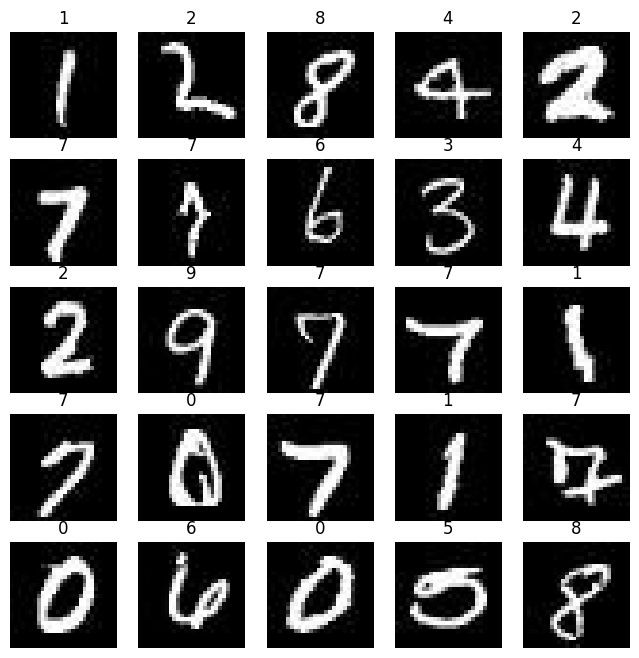

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"{y_train[i]}")
    plt.axis('off')
plt.show()


In [ ]:
#An alternative approach -
#Instead of adding the layers one by one as we just did, you can pass a list of layers when creating the Sequential model:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(50, activation="relu"),
    # keras.layers.Dense(200, activation="relu"),
    # keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(800, activation="softmax")
])

In [ ]:
### 3 hidden layers (300,200,100)  # train (accuracy: 0.9984 - loss: 0.0074 - val_accuracy: 0.9420 - val_loss: 0.2586) , #test (accuracy: 0.9460 - loss: 0.240)

### 1 hidden layers (300)          # train (accuracy: 0.9984 - loss: 0.0219 - val_accuracy: 0.9355 - val_loss: 0.2343) , #test (accuracy: 0.9318 - loss: 0.2270)
### 1 hidden layers (200)          # train (accuracy: 0.9979 - loss: 0.0311 - val_accuracy: 0.9320 - val_loss: 0.2395) , #test (accuracy : 0.9326 - loss: 0.2378)
### 1 hidden layers (100)          # train ( accuracy: 0.9828 - loss: 0.0746 - val_accuracy: 0.9244 - val_loss: 0.2606) , #test (accuracy: 0.9267 - loss: 0.2556)
### 1 hidden layers (3)            # train (accuracy: 0.6565 - loss: 1.0922 - val_accuracy: 0.6281 - val_loss: 1.1323) , #test (accuracy: 0.6222 - loss: 1.1394)
### 1 hidden layers (50)          # train (accuracy: 0.9748 - loss: 0.1138 - val_accuracy: 0.9171 - val_loss: 0.2931) , #test (accuracy : 0.6526 - loss: 0.2078)
### 1 hidden layers (800)          # train ( accuracy: 0.9478 - loss: 0.2052 - val_accuracy: 0.9118 - val_loss: 0.3105) , #test (accuracy: 0.9107 - loss: 0.3078)




In [ ]:
#Compile model
model.compile(loss="sparse_categorical_crossentropy",    #This is the loss we use for multiclass classification problem
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.2629 - loss: 4.1224 - val_accuracy: 0.7471 - val_loss: 1.0787
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8116 - loss: 0.8568 - val_accuracy: 0.8493 - val_loss: 0.5775
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8772 - loss: 0.4927 - val_accuracy: 0.8790 - val_loss: 0.4475
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9020 - loss: 0.3850 - val_accuracy: 0.8870 - val_loss: 0.3982
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9087 - loss: 0.3415 - val_accuracy: 0.8916 - val_loss: 0.3840
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9118 - loss: 0.3020 - val_accuracy: 0.9060 - val_loss: 0.3456
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9237 - loss: 0.2825 - val_accuracy: 0.9038 - val_loss: 0.3411
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9346 - loss: 0.2395 - val_accu

In [ ]:
model.evaluate(X_test, y_test)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9107 - loss: 0.3078


[0.31124407052993774, 0.9097395539283752]

In [ ]:
#Prediction
X_new = X_test[:3]


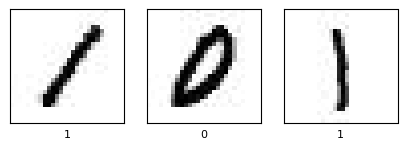

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
for i in range(len(X_new)):
    plt.subplot(1, len(X_new), i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_new[i], cmap=plt.cm.binary)
    plt.xlabel(y_test[i], fontsize=8) # Use y_test for labels of X_test subset
plt.show()

In [ ]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.96, 0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_test[:3]

array([1, 0, 1])

In [ ]:
import numpy as np

y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([1, 0, 1])